<a href="https://colab.research.google.com/github/MateuszPasternak/PythonForML_AGH/blob/main/DataPrepForRegression_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stackoverflow_full.csv')

In [ ]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [ ]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
from sklearn.preprocessing import (
  MinMaxScaler,
  StandardScaler,
)

Categorical Values

In [ ]:
df_numerical = data.select_dtypes("number")
df_categorical = data.select_dtypes("object")

In [ ]:
df_categorical["Age"] = df_categorical["Age"].replace({"<35": 1, ">35": 0})
df_numerical["Age"] = df_categorical[["Age"]]

In [ ]:
df_categorical["MentalHealth"] = df_categorical["MentalHealth"].replace({"No": 0, "Yes": 1})
df_numerical["MentalHealth"] = df_categorical[["MentalHealth"]]

In [ ]:
df3 = df_categorical.copy()

df_num = pd.get_dummies(df3,
                     columns = ['EdLevel'])
df_num = pd.get_dummies(df_num,
                     columns = ['Gender'])
df_num = pd.get_dummies(df_num,
                     columns = ['Accessibility'])

#display(df3)
df_num.head()

,Age,MentalHealth,MainBranch,Country,HaveWorkedWith,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,Dev,Sweden,C++;Python;Git;PostgreSQL,1,0,0,0,0,1,0,0,1,0
1,1,0,Dev,Spain,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0,0,0,0,1,1,0,0,1,0
2,1,0,Dev,Germany,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0,0,0,1,0,0,1,0
3,1,0,Dev,Canada,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0,0,0,0,1,1,0,0,1,0
4,0,0,NotDev,Singapore,C++;Python,0,0,0,1,0,1,0,0,1,0


In [ ]:
df_num.drop(['MainBranch', 'Country', 'HaveWorkedWith'], axis=1)

,Age,MentalHealth,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,0,0,0,0,1,1,0,0,1,0
73458,0,0,0,0,0,0,1,1,0,0,1,0
73459,1,0,0,0,0,0,1,1,0,0,1,0
73460,1,1,0,0,0,0,1,1,0,0,0,1


In [ ]:
for i in df_num:
  df_numerical[i] = df_num[i]

In [ ]:
data = df_numerical
data.head()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age,MentalHealth,MainBranch,...,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,0,1,7,4,51552.0,4,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
1,1,1,12,5,46482.0,12,1,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
2,2,1,15,6,77290.0,7,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
3,3,1,9,6,46135.0,13,0,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
4,4,0,40,30,160932.0,2,0,0,0,NotDev,...,0,0,0,1,0,1,0,0,1,0


Data split (testing, training)

In [ ]:
data = data.dropna()

In [ ]:
data = data.drop_duplicates()

In [ ]:
from sklearn.model_selection import train_test_split

#Unnamed: 0 	Age 	Accessibility 	EdLevel 	Employment 	Gender 	MentalHealth 	MainBranch 	YearsCode
#YearsCodePro 	Country 	PreviousSalary 	HaveWorkedWith 	ComputerSkills 	Employed

data = data.drop(['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith',
               'MainBranch','ComputerSkills', 'Employed','Accessibility_No'], axis = 1)

y = data['MentalHealth']

Data_train, Data_test = train_test_split(data, test_size=0.2, random_state=1)
Data_train, Data_val = train_test_split(Data_train, test_size=0.25, random_state=1)

dataX = Data_train[Data_train['YearsCodePro'] <= Data_train['YearsCode']]

Data operation on train set

Normalizing data

In [ ]:
X_train = dataX.drop(['MentalHealth'], axis = 1)
y_train = dataX['MentalHealth']

X_test = Data_test.drop(['MentalHealth'], axis = 1)
y_test = Data_test['MentalHealth']

X_val = Data_val.drop(['MentalHealth'], axis = 1)
y_val = Data_val['MentalHealth']

**Less features**

In [ ]:
XX_train = dataX.drop(['MentalHealth','YearsCodePro','YearsCode'], axis = 1)
yy_train = dataX['MentalHealth']

XX_test = Data_test.drop(['MentalHealth','YearsCodePro','YearsCode'], axis = 1)
yy_test = Data_test['MentalHealth']

XX_val = Data_val.drop(['MentalHealth','YearsCodePro','YearsCode'], axis = 1)
yy_val = Data_val['MentalHealth']

minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized_2 = minmax_scaler.fit_transform(XX_train)

In [ ]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized = minmax_scaler.fit_transform(X_train)
dataTrain_normalized_old = minmax_scaler.fit_transform(Data_train)

<Axes: >

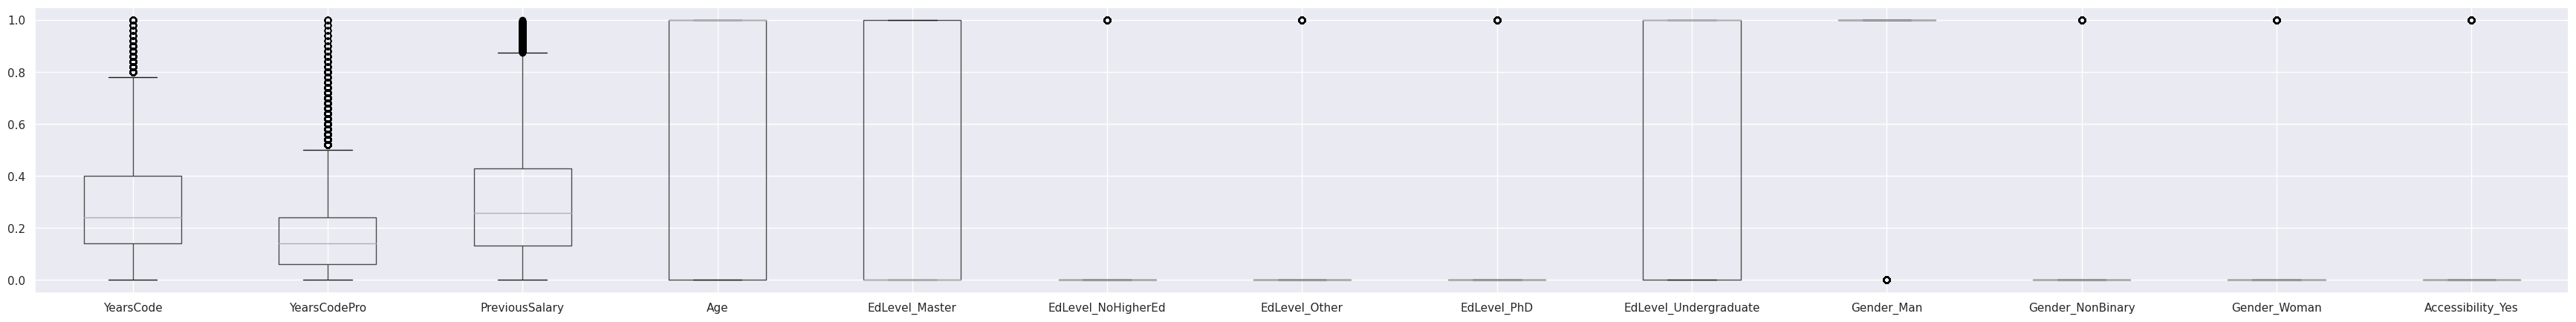

In [ ]:
plt.figure(figsize=(44, 5))
dataTrain_normalized.boxplot()

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

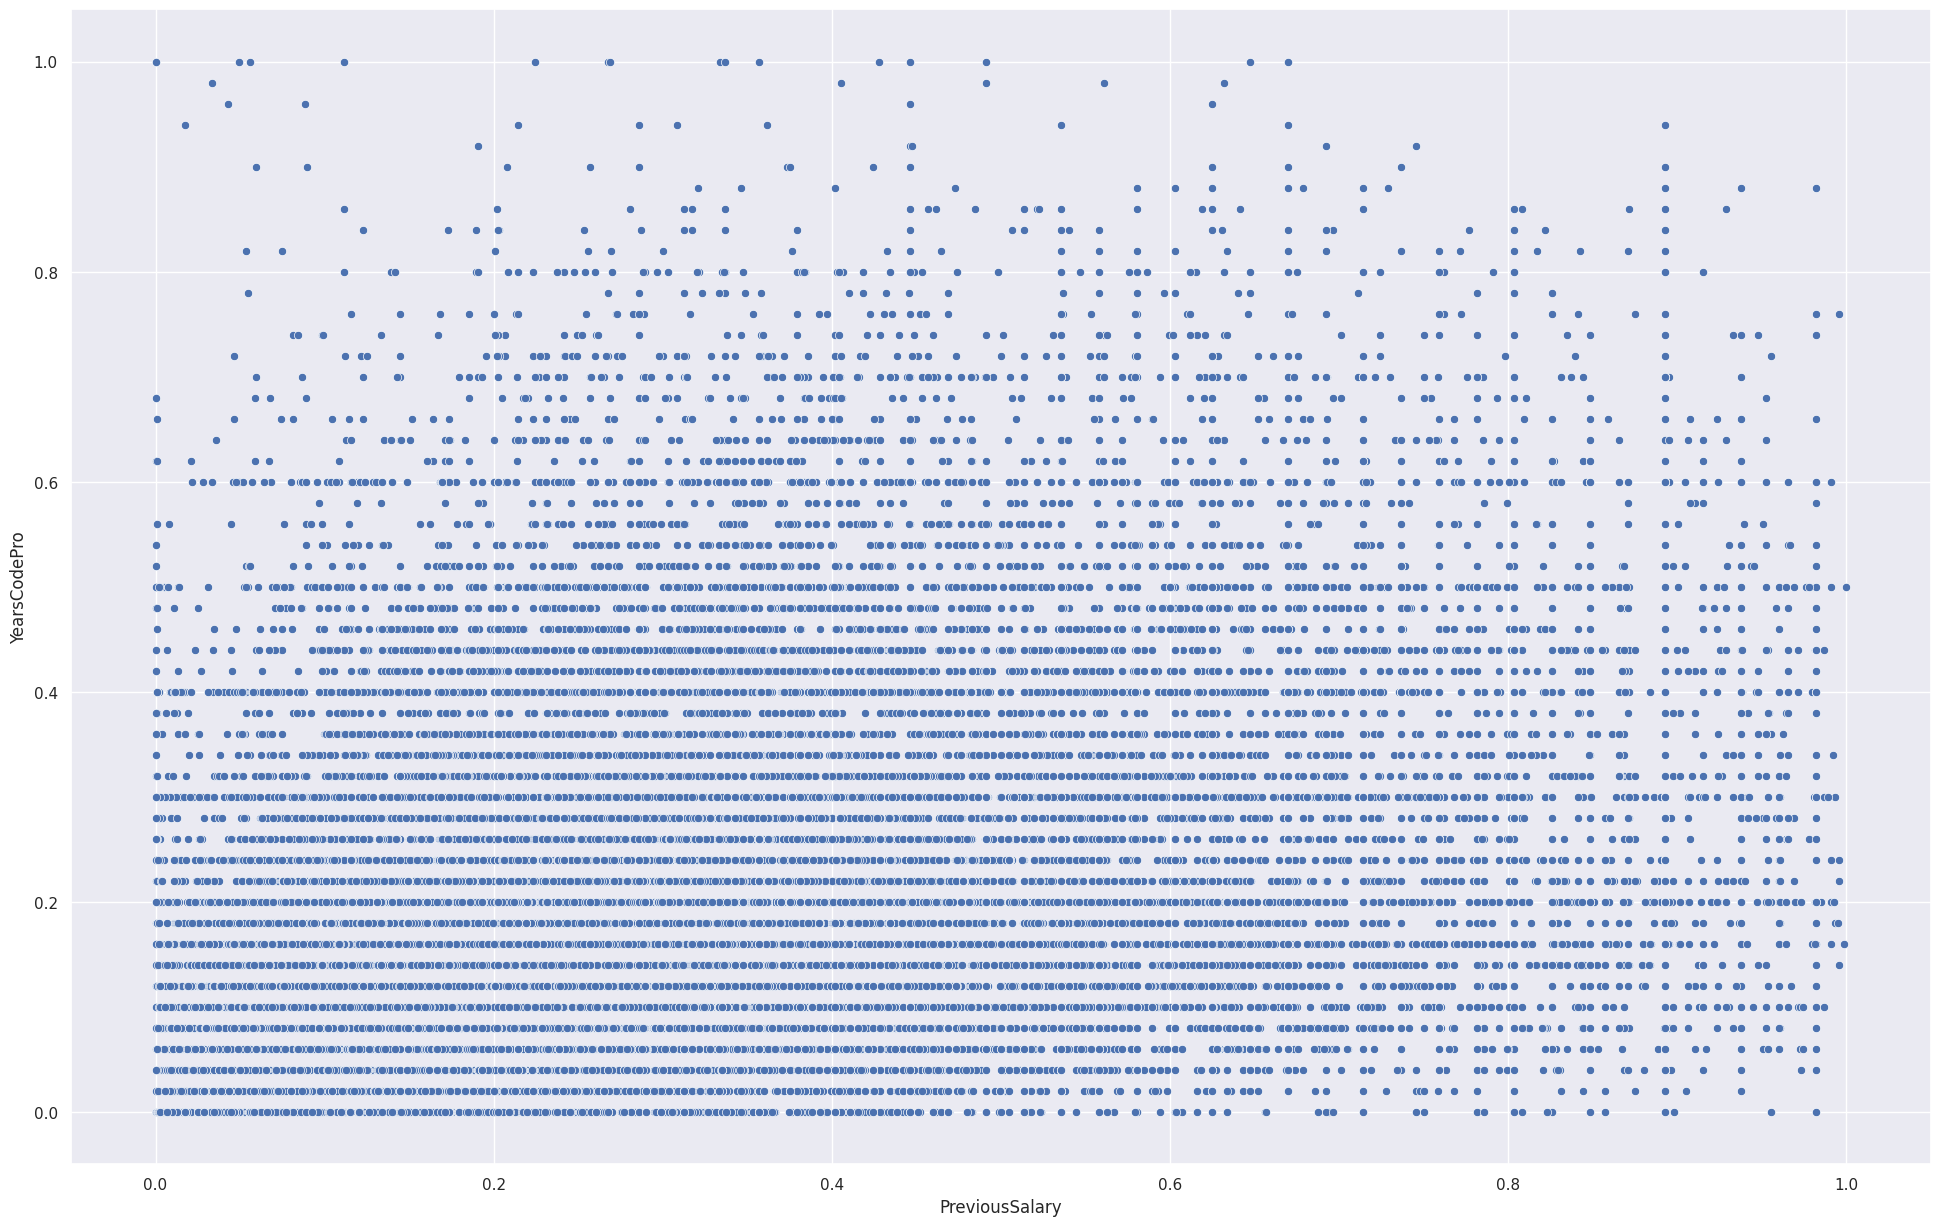

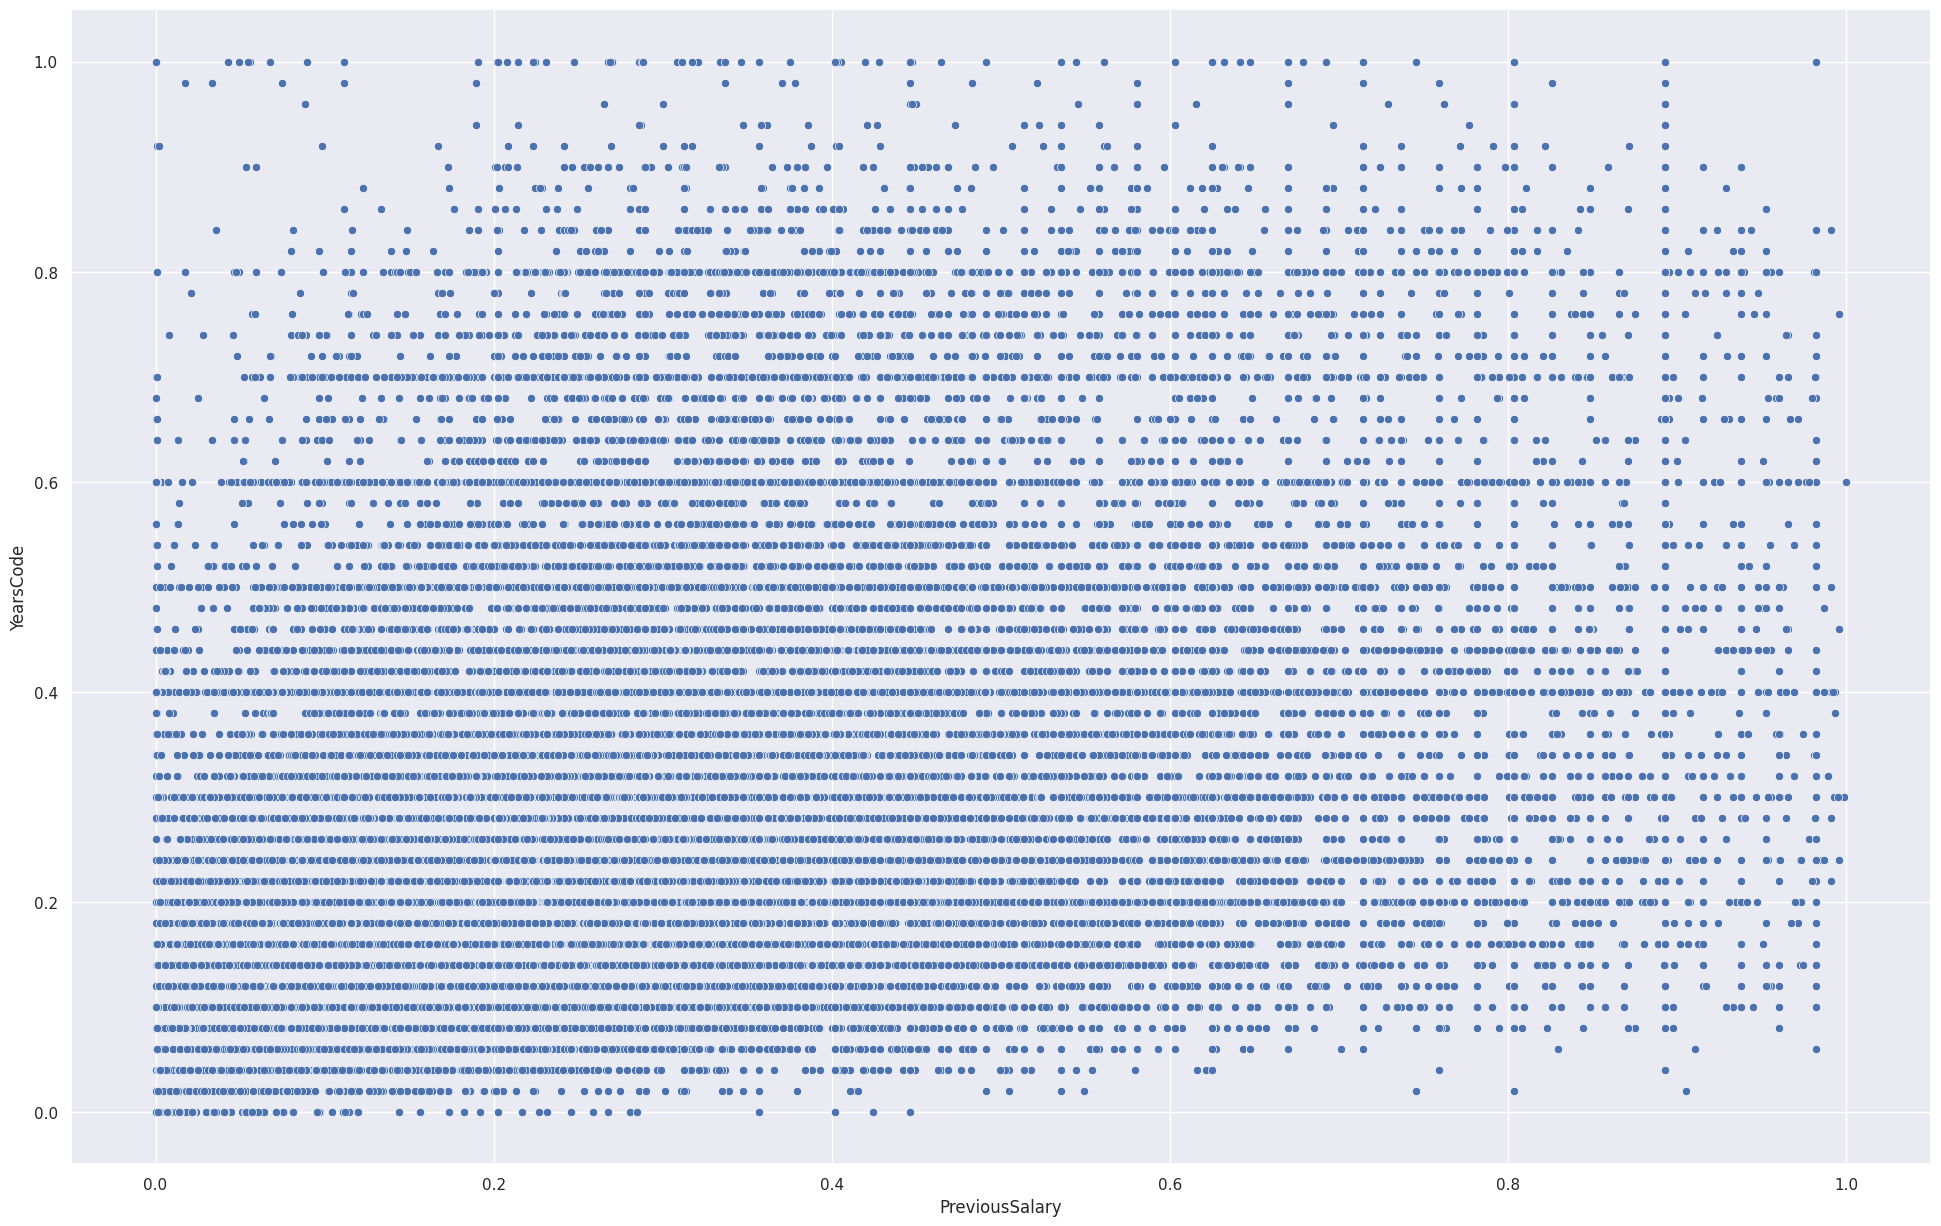

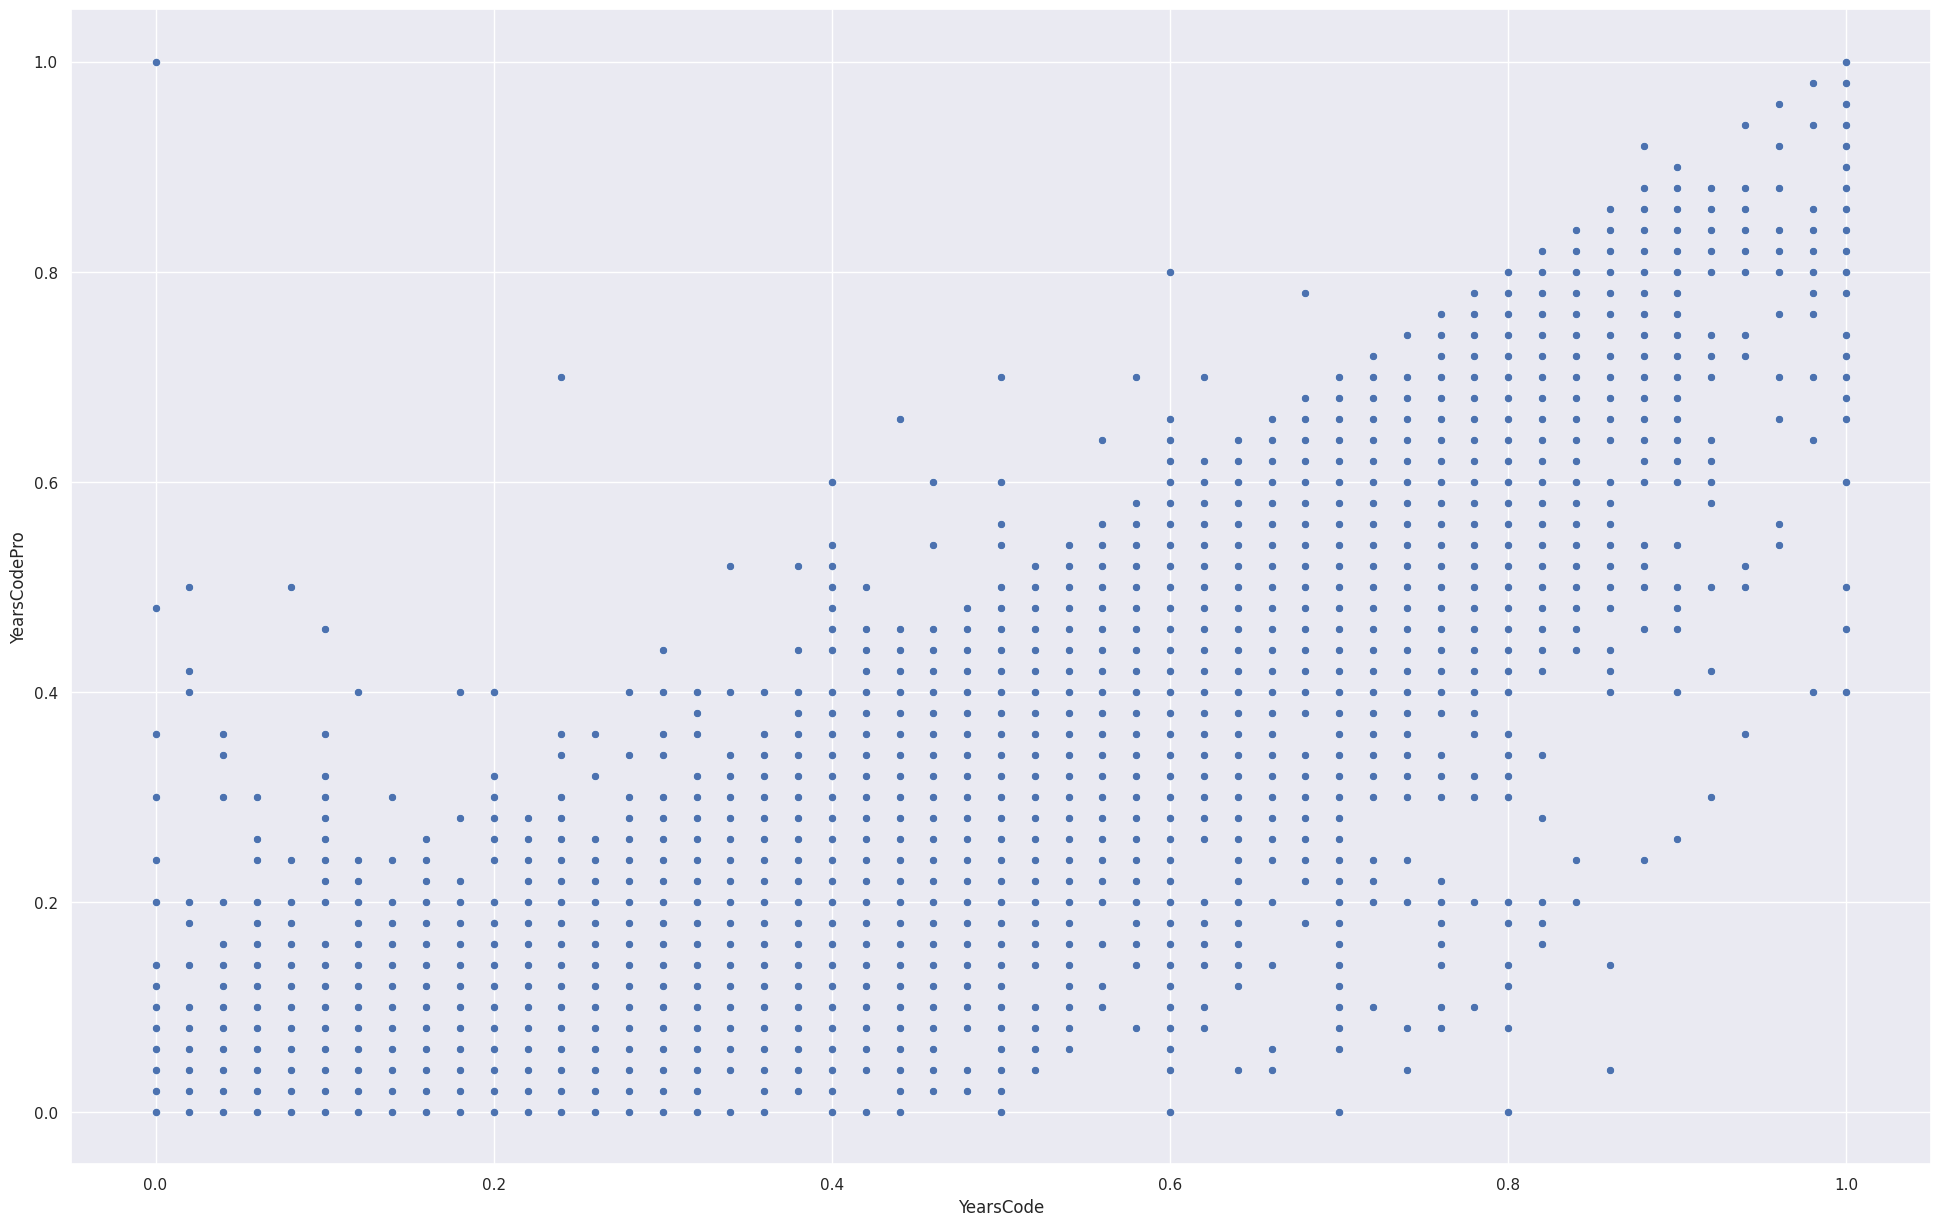

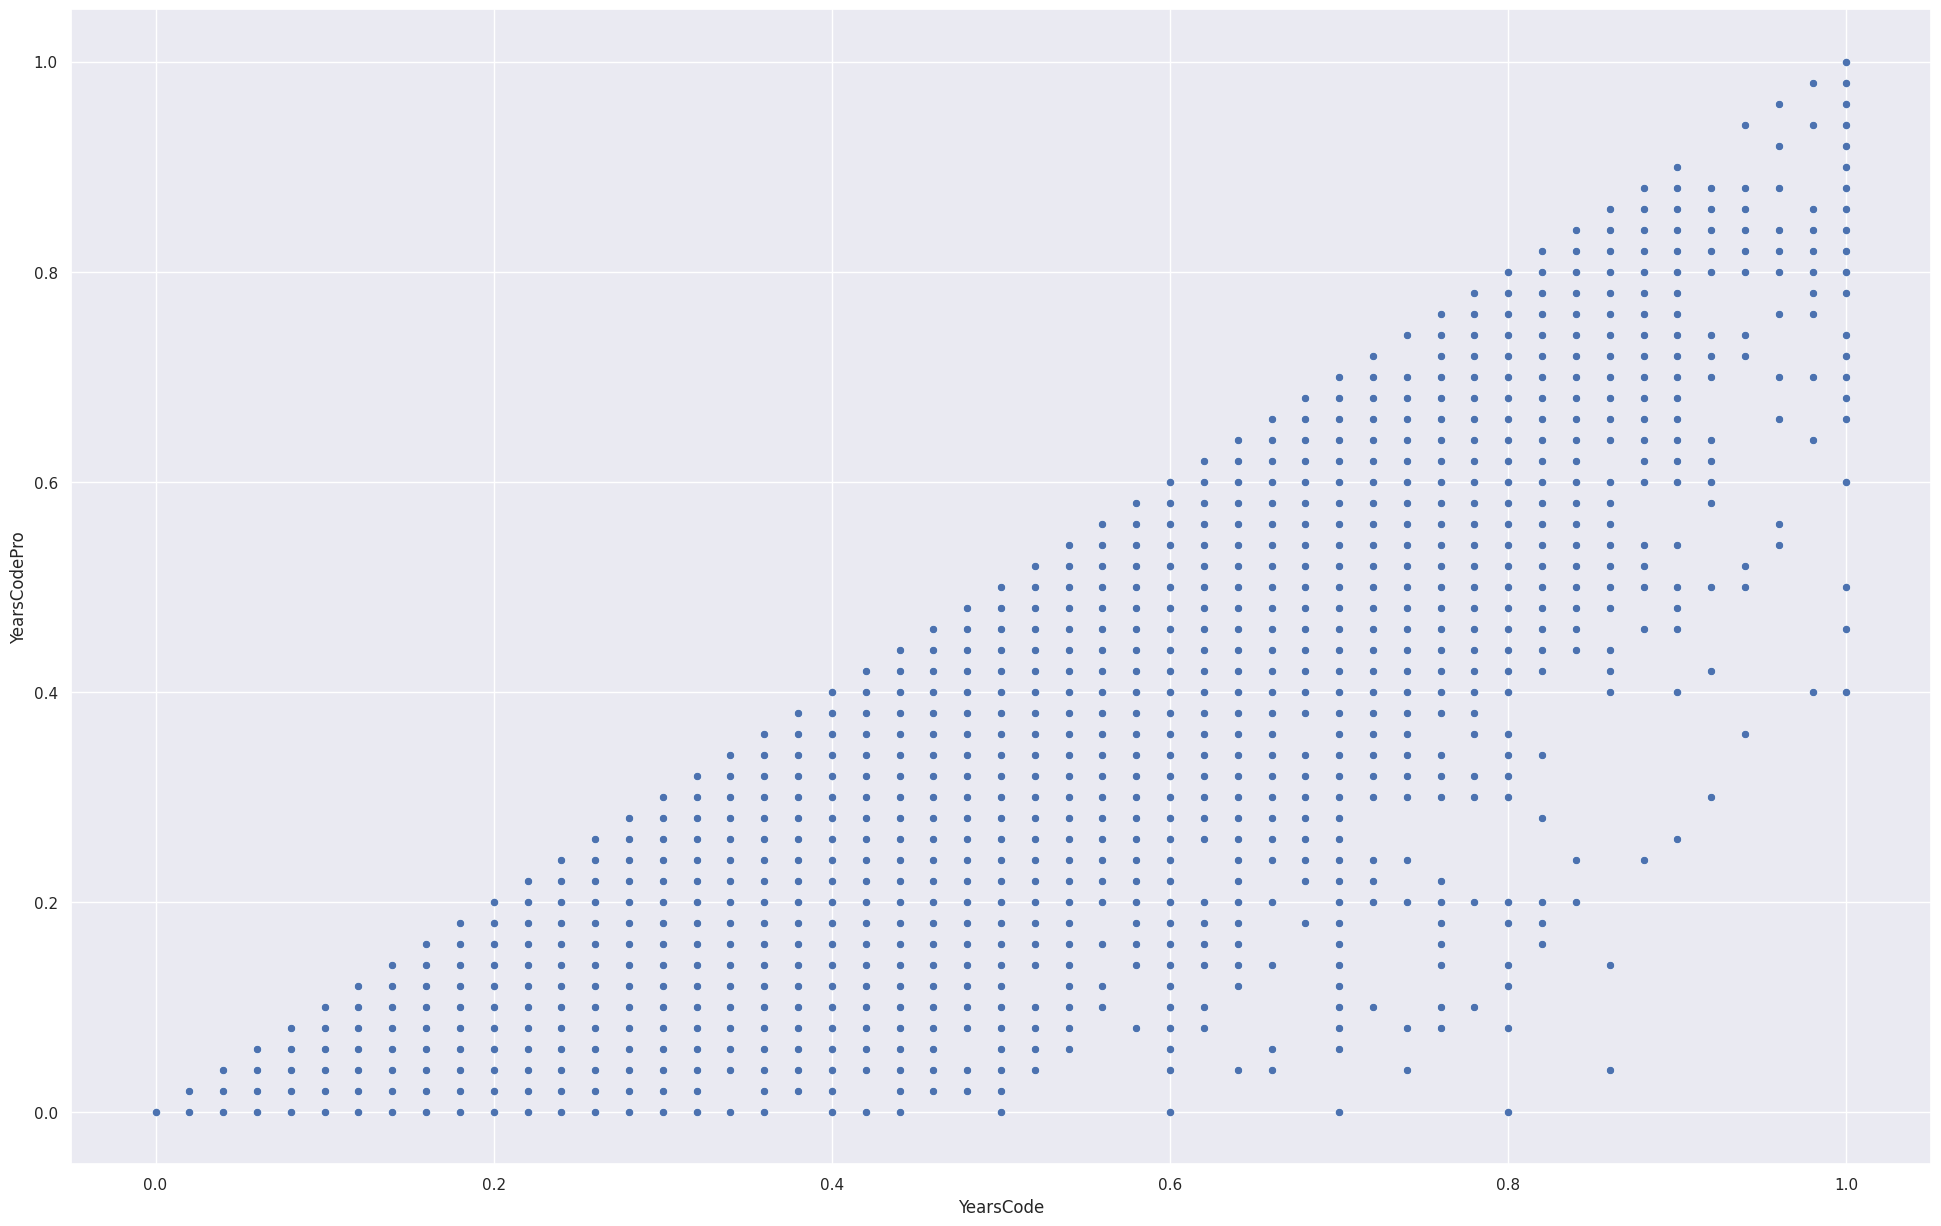

In [ ]:
sns.set_theme()

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCode')

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized_old, x='YearsCode', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='YearsCode', y='YearsCodePro')

in report describe why have you cut data above line above

# **Classification Task**

Imports

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

Define classifiers

In [ ]:
#clf = svm.SVC(kernel='rbf')
#clf = MLPClassifier()
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = tree.DecisionTreeClassifier(max_depth=3)

**SVM clasiffiers**

SVM classifier kernel linear

In [ ]:
clf = svm.SVC(kernel='linear', degree=3, random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7744786062590142, val: 0.3119891008174387
tn train: 33830, fp train: 0, fn train: 9851, tp train: 0
tn val: 1708, fp val: 9651, fn val: 449, tp val: 2872


In [ ]:
clf = svm.SVC(kernel='linear', degree=2, random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7744786062590142, val: 0.3119891008174387
tn train: 33830, fp train: 0, fn train: 9851, tp train: 0
tn val: 1708, fp val: 9651, fn val: 449, tp val: 2872


SVM classifier kernel poly

In [ ]:
clf = svm.SVC(kernel='poly', random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7774318353517548, val: 0.2269073569482289
tn train: 33553, fp train: 277, fn train: 9445, tp train: 406
tn val: 10, fp val: 11349, fn val: 0, tp val: 3321


In [ ]:
clf = svm.SVC(kernel='poly', degree=2, random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7761727066688033, val: 0.7737738419618528
tn train: 33695, fp train: 135, fn train: 9642, tp train: 209
tn val: 11359, fp val: 0, fn val: 3321, tp val: 0


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y_train, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7744786062590142, val: 0.7737738419618528
tn train: 33830, fp train: 0, fn train: 9851, tp train: 0
tn val: 11359, fp val: 0, fn val: 3321, tp val: 0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 30, 20), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y_train, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.2255213937409858, val: 0.22622615803814713
tn train: 0, fp train: 33830, fn train: 0, tp train: 9851
tn val: 0, fp val: 11359, fn val: 0, tp val: 3321


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
np.count_nonzero(y == 1)

16504

In [ ]:
np.count_nonzero(y_train == 1)

9851

In [ ]:
np.count_nonzero(y_test == 1)

3247

In [ ]:
np.count_nonzero(y_val == 1)

3321

In [ ]:
np.count_nonzero(y_pred_train == 1)

43681

In [ ]:
np.count_nonzero(y_pred == 1)

14680

<Axes: >

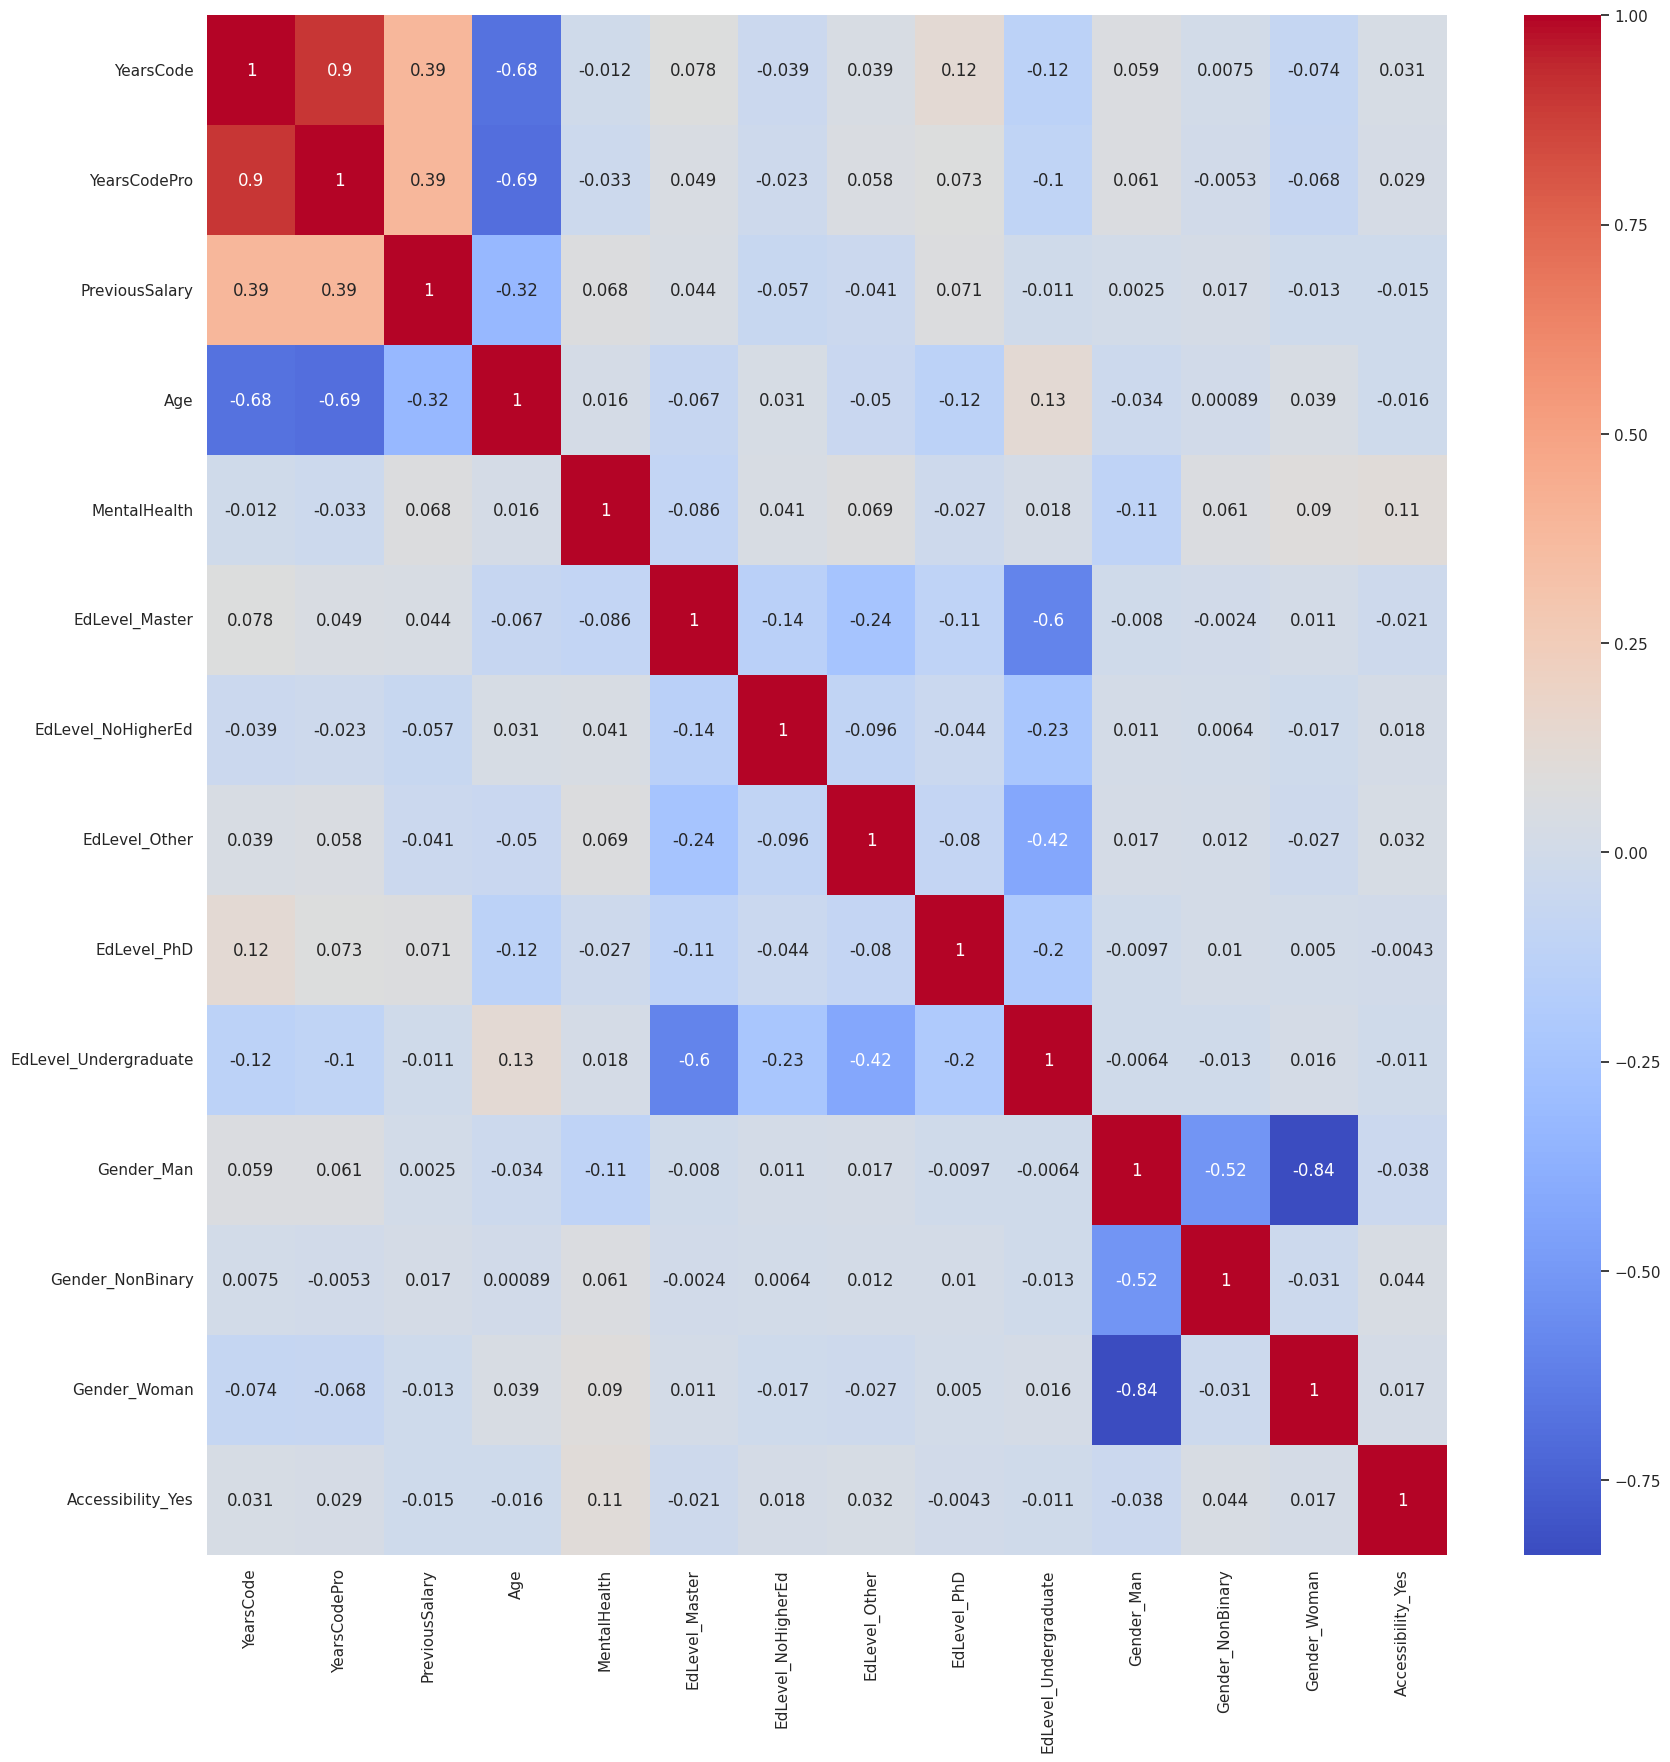

In [ ]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
plt.figure(figsize=(20, 20))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 30, 20), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized_2, XX_val]
x_11 = pd.concat(x_frames)
y_frames = [yy_train, yy_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(XX_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7759895606785558, val: 0.7739782016348774
tn train: 33685, fp train: 145, fn train: 9640, tp train: 211
tn val: 11350, fp val: 9, fn val: 3309, tp val: 12


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
